<a href="https://colab.research.google.com/github/a00700c/AI-teamproject/blob/main/%ED%98%84%EC%8A%B9%EA%B5%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
# dataset import
data = pd.read_csv('/content/sample_data/reData.csv')

In [ ]:
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,18050,2012,1,23,1,994,-24,-12.0,1032.0,NW,4.92,0,0
1,1058,2010,2,14,1,980,-14,-7.0,1029.0,cv,0.89,0,0
2,18051,2012,1,23,2,972,-24,-12.0,1032.0,NW,8.05,0,0
3,26589,2013,1,12,20,886,-8,-7.0,1023.0,cv,1.34,0,0
4,26591,2013,1,12,22,858,-10,-9.0,1024.0,cv,0.89,0,0


In [ ]:
df_dum = pd.get_dummies(data['cbwd'])

In [ ]:
data = pd.concat([data, df_dum], axis=1)

In [ ]:
data = data.drop('cbwd', axis=1)

In [ ]:
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
0,18050,2012,1,23,1,994,-24,-12.0,1032.0,4.92,0,0,0,1,0,0
1,1058,2010,2,14,1,980,-14,-7.0,1029.0,0.89,0,0,0,0,0,1
2,18051,2012,1,23,2,972,-24,-12.0,1032.0,8.05,0,0,0,1,0,0
3,26589,2013,1,12,20,886,-8,-7.0,1023.0,1.34,0,0,0,0,0,1
4,26591,2013,1,12,22,858,-10,-9.0,1024.0,0.89,0,0,0,0,0,1


In [ ]:
len(data)

41757

In [ ]:
# input feature 와 output feature 분리
data_x = data.drop(['pm2.5', 'No', 'year', 'month', 'day', 'hour'], axis=1)
data_y = data['pm2.5']

In [ ]:
# train set 과 test set 을 분리한다. 8:2의 비율로 무작위로 추출하였다.
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.015, shuffle=True, random_state=7)

In [ ]:
len(X_train)

41130

In [ ]:
X_train.head()

,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
7604,21,32.0,1003.0,4.92,0,0,0,0,1,0
28446,9,9.0,1019.0,3.13,0,9,0,1,0,0
26544,-6,-2.0,1028.0,1.78,0,0,0,0,0,1
22245,16,30.0,1006.0,1.79,0,0,0,0,0,1
10254,25,31.0,1001.0,19.68,0,0,0,0,1,0


In [ ]:
count = [500, 1000, 2000, 4000, 8000, 16000, 32000, 41130]

best parameters :  {'learning_rate': 0.02, 'max_depth': 12, 'n_estimators': 2000}
RMSE :  100.39156921412173
MAPE :  123.80318451921333
best parameters :  {'learning_rate': 0.02, 'max_depth': 12, 'n_estimators': 2000}
RMSE :  89.15378083914374
MAPE :  126.13401365954347
best parameters :  {'learning_rate': 0.02, 'max_depth': 12, 'n_estimators': 2000}
RMSE :  84.79235883218442
MAPE :  112.97270590218571
best parameters :  {'learning_rate': 0.02, 'max_depth': 12, 'n_estimators': 2000}
RMSE :  83.11876431091711
MAPE :  109.2996716152854
best parameters :  {'learning_rate': 0.02, 'max_depth': 12, 'n_estimators': 2000}
RMSE :  81.3277411134794
MAPE :  106.45991932685092
best parameters :  {'learning_rate': 0.02, 'max_depth': 12, 'n_estimators': 2000}
RMSE :  76.8536744838746
MAPE :  98.60438846517657


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


best parameters :  {'learning_rate': 0.02, 'max_depth': 12, 'n_estimators': 2000}
RMSE :  75.56459866956344
MAPE :  100.11107768587789
best parameters :  {'learning_rate': 0.02, 'max_depth': 12, 'n_estimators': 2000}
RMSE :  73.89218088288386
MAPE :  100.42664797612989


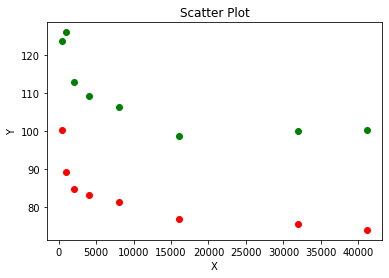

In [ ]:

from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error 
import numpy as np
import matplotlib.pyplot as plt
rmse = []
mape = []

for i in count:

  new_X_train = X_train[:i]
  new_Y_train = y_train[:i]
  GBR = GradientBoostingRegressor()
  # GridSearch 를 사용하기 위해 parameters 를 정한다.
  parameters = {'learning_rate': [0.02],
                'n_estimators': [2000],
                'max_depth': [12]
                }

  # GBR 을 모델로, parameters 를 파라미터로 받고, cv는 교차 검증을 위해 분할하는 데이터 셋의 개수이다.
  grid_GBR = GridSearchCV(estimator=GBR, param_grid=parameters, cv=5, n_jobs=-1)

  # train set 을 학습시킨다.
  grid_GBR.fit(new_X_train, new_Y_train)

  # GridsearchCV 를 통해 찾아낸 best parameters 를 출력한다.
  print('best parameters : ', grid_GBR.best_params_)

  # 학습된 모델을 이용하여 test set 에 대하여 predict 를 진행한다.
  pred = grid_GBR.predict(X_test)

  new_Y_train.to_excel( str(i) + '.xlsx')
  y_test.to_excel( str(i) + '정답.xlsx')
  print('RMSE : ', np.sqrt(mean_squared_error(pred, y_test)))
  print('MAPE : ', mean_absolute_percentage_error(y_test, pred)*100)
  # RMSE와 MAPE를 출력한다.
  rmse.append(np.sqrt(mean_squared_error(pred, y_test)))
  mape.append(mean_absolute_percentage_error(y_test, pred)*100)

plt.scatter(count,rmse,c="red")
plt.scatter(count,mape,c="green")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot")
plt.show()